In [1]:
# Import pandas,numpy & random
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# Import Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

                                     Βασικές Πληροφορίες Dataset
Στο Dataset αυτό, έχουμε 891 καταχωρήσεις επιβατών του Τιτανικού. Ανάμεσα στα στοιχεία βρίσκουμε Ονόματα, Φύλο, Ηλικία, σημείο επιβίβασης κ.α. 
Στην λίστα αυτή επίσης, βλέπουμε και το ποιοι από αυτούς τους επιβάτες, κατάφεραν να επιβιώσουν του ναυαγίου.

In [4]:
#print(train_df.columns)
#print(train_df.columns.values)
#print(train_df.columns.values.tolist())
print(list(train_df))
print('-'*100)
print('Ο συνολικός αριθμός των στηλών είναι: ',len(list(train_df))) # Ο αριθμός των στηλών

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------------------------------------------------------------------
Ο συνολικός αριθμός των στηλών είναι:  12


In [5]:
# Εμφάνιση των πρώτων 5 γραμμών του Dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


                                 Μία γρήγορη ματιά στο Dataset.

Παρατηρούμε ότι η πλειοψηφία των επιβατών, είναι ηλικίας 18 έως 40 ετών.

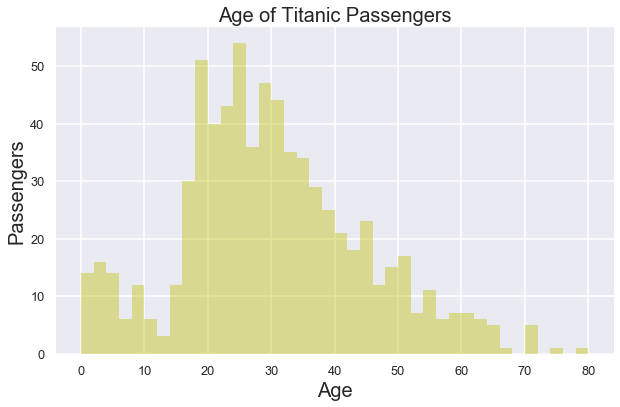

In [7]:
#train_df['Age'].hist(bins=40,color='darkred',alpha=0.7)
x = train_df['Age'].dropna()

bins = np.arange(0, 82, 2)
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.distplot(x, kde=False, bins = bins, color = 'y')
ax.axes.set_title("Age of Titanic Passengers",fontsize=20)
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Passengers",fontsize=20)

plt.savefig('Age.png')

Η πλειοψηφία των επιβατών είναι άντρες. Από το σύνολο των 891 επιβατών, οι 577 είναι άντρες και οι 314 γυναίκες

Sex
female    314
male      577
dtype: int64
----------------------------------------------------------------------------------------------------


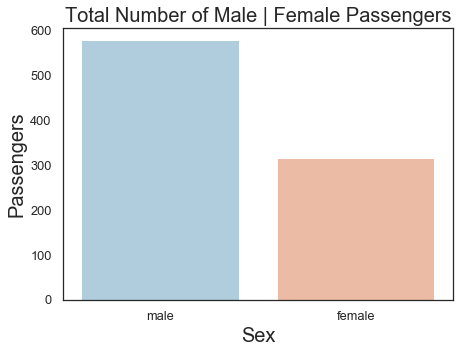

In [8]:
print(train_df.groupby(['Sex']).size())
print('-'*100)
plt.figure(figsize=(7,5))
sns.set_style('white')
sns.set_context('poster',font_scale=0.8)
ax = sns.countplot(x='Sex',data=train_df,palette='RdBu_r')
ax.axes.set_title("Total Number of Male | Female Passengers",fontsize=20)
ax.set_xlabel("Sex",fontsize=20)
ax.set_ylabel("Passengers",fontsize=20)
#plt.savefig('Sex.png')

Οι περισσότεροι επιβάτες επιβιβάστηκαν στην πόλη Southampton.
    - Cheerbourg 168 επιβιβάσεις
    - Queenstown 77 επιβιβάσεις
    - Southampton 644 επιβιβάσεις

Embarked
C    168
Q     77
S    644
dtype: int64
----------------------------------------------------------------------------------------------------


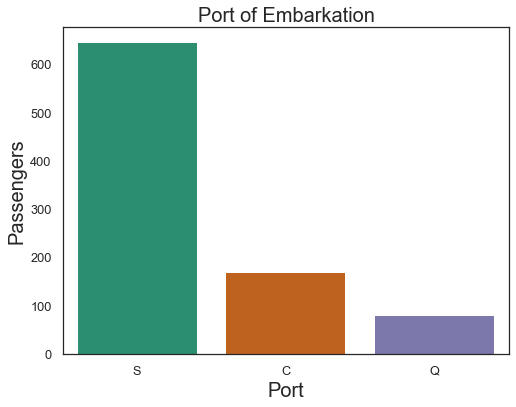

In [9]:
print(train_df.groupby(['Embarked']).size())
print('-'*100)
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.set_context('poster',font_scale=0.8)
ax = sns.countplot(x='Embarked',data=train_df,palette='Dark2')
ax.axes.set_title("Port of Embarkation",fontsize=20)
ax.set_xlabel("Port",fontsize=20)
ax.set_ylabel("Passengers",fontsize=20)
plt.savefig('Port.png')

Οι περισσότεροι επιβάτες ανήκουν στην 3η κατηγορία.
    - 1η Κατηγορία: 216 επιβάτες
    - 2η κατηγορία: 184 επιβάτες
    - 3η κατηγορία: 491 επιβάτες

Pclass
1    216
2    184
3    491
dtype: int64
----------------------------------------------------------------------------------------------------


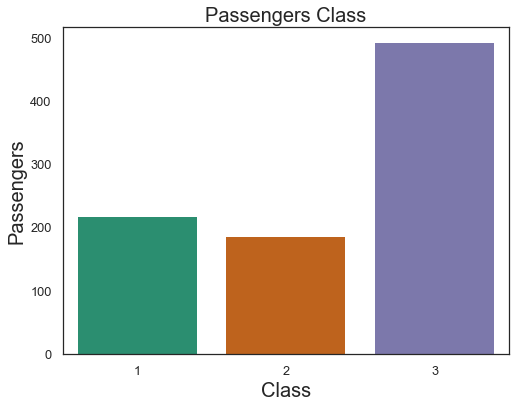

In [10]:
print(train_df.groupby(['Pclass']).size())
print('-'*100)
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.set_context('poster',font_scale=0.8)
ax = sns.countplot(x='Pclass',data=train_df,palette='Dark2')
ax.axes.set_title("Passengers Class",fontsize=20)
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Passengers",fontsize=20)
plt.savefig('Class.png')

### Έλεγχος για καταχωρήσεις που πιθανόν να λείπουν.
Σε σύνολο 891 καταχωρήσεων, βλέπουμε ότι λείπουν 
    - 177 καταχωρήσεις στην ηλικία
    - 687 καταχωρήσεις στην καμπίνα
    - 2 καταχωρήσεις στην στήλη της επιβίβασης. Ο αριθμός των συνολικών καταχωρήσεων που λείπουν είναι 866.
Ακολουθεί αναπαράσταση με heatmap, για να έχουμε μία γενική εικόνα.

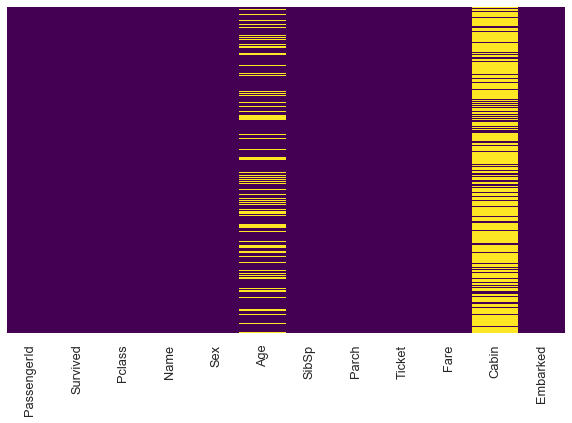

In [11]:
plt.figure(figsize=(10,6))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [12]:
print(train_df.isnull().sum())
print('-'*50)
print('Συνολικά λείπουν: ',train_df.isnull().sum().sum(),' καταχωρήσεις')
print('-'*50)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Συνολικά λείπουν:  866  καταχωρήσεις
--------------------------------------------------


In [13]:
#train_df.describe(include=['Ο'])
#train_df.describe()
#train_df.describe(exclude=[np.number])

### DATA ANALYSIS

Θα προσπαθήσουμε να κατανοήσουμε εάν οι θάνατοι που προήλθαν από την βύθιση του Τιτανικού, ήταν τυχαίοι ή επηρεάστηκαν από διάφορους παράγοντες.
    - Για παράδειγμα, ίσως οι θάνατοι επηρεάζονται από την ηλικία. Μπορεί άτομα μικρής ή μεγάλης ηλικίας να είχαν προτεραιότητα στις σωσίβιες λέμβους.
    - Ίσως επίσης, να είχαν προτεραιότητα οι γυναίκες.
    - Επιπλέον, είναι πολύ πιθανό να υπήρχε διαχωρισμός των επιβατών, ανάμεσα σε αυτούς της πρώτης κατηγορίας και σε εκείνους των χαμηλότερων.
    
Με τον έλεγχο, επιβεβαιώνουμε ότι πολλά πράγματα έπαιξαν τον ρόλο τους σε αυτό το κομμάτι.
    - Απο τα 342 άτομα που διασώθηκαν, τα 136 ήταν της πρώτης κλάσης, τα 119 της μεσσαίας κλάσης και τα υπόλοιπα 87 βρισκόταν στην τρίτης κλάση.
    - Από το σύνολο των ανθρώπων που σώθηκαν, οι 233 ήταν γυναίκες και οι 109 άντρες.
    
    - To 63% των επιβατών της πρώτης κλάσης επέζησε του δυστυχήματος. Από τους επιβάτες της τρίτης κλάσης, επιβίωσε μόνο το 24%.
    - Το 74% των γυναικών επιβίωσε, ενώ το αντίστοιχο ποσοστό των ανδρών είναι 18%.

In [14]:
# ΕΛΕΓΧΟΣ CLASS
print('Συνολικά σώθηκαν:',train_df['Survived'].sum(),' άτομα.')
print('-'*100)
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
a = train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).sum().sort_values(by='Survived', ascending=False)
print(a)
print('-'*100)
a['Percentage']= a['Survived']/a['Survived'].sum()
print(a)

Συνολικά σώθηκαν: 342  άτομα.
----------------------------------------------------------------------------------------------------
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------------------------------------------------------------------
   Pclass  Survived
0       1       136
2       3       119
1       2        87
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       136    0.397661
2       3       119    0.347953
1       2        87    0.254386


                            Αναπαράσταση με Countplot

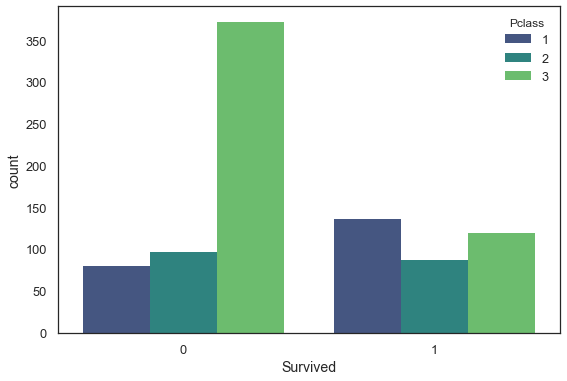

In [15]:
# Έλεγχος Class
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='viridis')

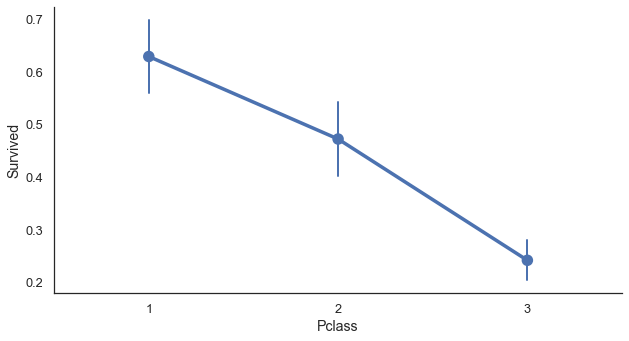

In [16]:
# Έλεγχος Class
sns.factorplot('Pclass','Survived', data=train_df,size=5,aspect=1.8, 
               errwidth = 2, scale = 0.7)

In [17]:
# ΕΛΕΓΧΟΣ ΦΥΛΛΟΥ
print('Συνολικά σώθηκαν:',train_df['Survived'].sum(),' άτομα.')
print('-'*100)
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
b = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).sum().sort_values(by='Survived', ascending=False)
print(b)
print('-'*100)
b['Percentage']= b['Survived']/b['Survived'].sum()
print(b)

Συνολικά σώθηκαν: 342  άτομα.
----------------------------------------------------------------------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------------------------------------------------------------------------------------------------
      Sex  Survived
0  female       233
1    male       109
----------------------------------------------------------------------------------------------------
      Sex  Survived  Percentage
0  female       233    0.681287
1    male       109    0.318713


                                Αναπαράσταση με Countplot

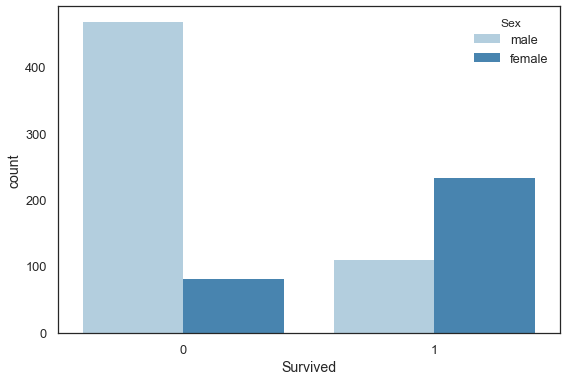

In [18]:
# Έλεγχος Class
plt.figure(figsize=(9,6))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='Blues')

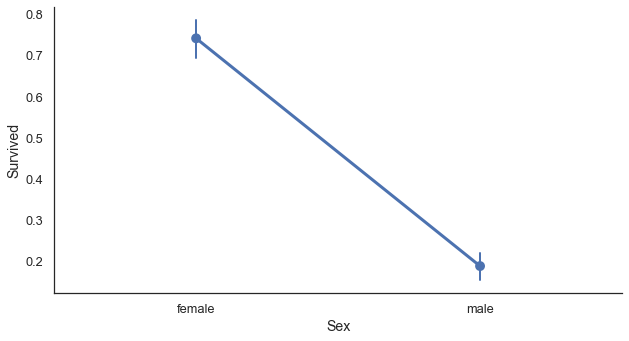

In [19]:
# Έλεγχος Class
sns.factorplot('Sex','Survived', data=train_df,size=5,aspect=1.8, 
               errwidth = 2, scale = 0.6, order=['female','male'])

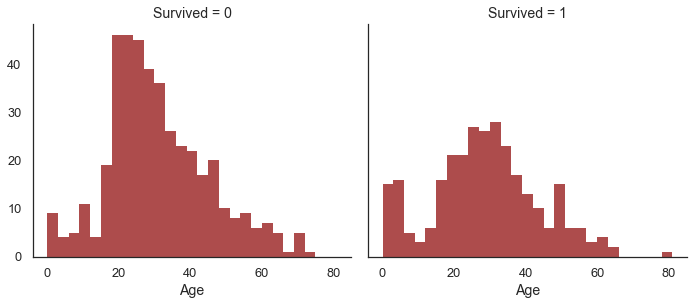

In [20]:
# ΕΛΕΓΧΟΣ ΗΛΙΚΙΑΣ
bins = np.arange(0, 82, 3)
g = sns.FacetGrid(train_df, col="Survived", size=4.5, aspect=1.1)
g = g.map(plt.hist, "Age", color="darkred", alpha=0.7, bins=bins)

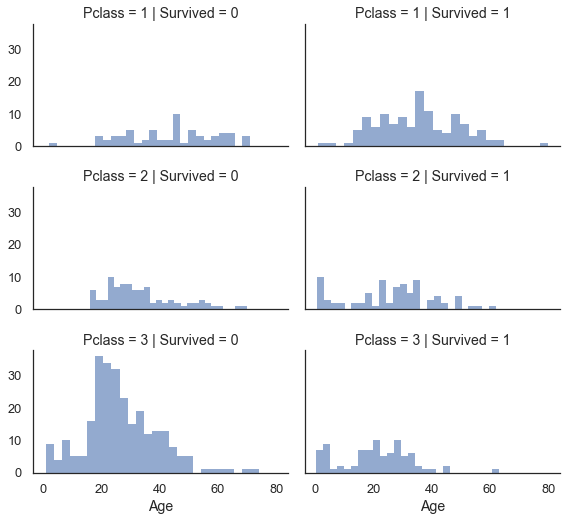

In [24]:
# Έλεγχος Class & Ηλικίας
sns.set_style('white')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=26)
grid.add_legend();

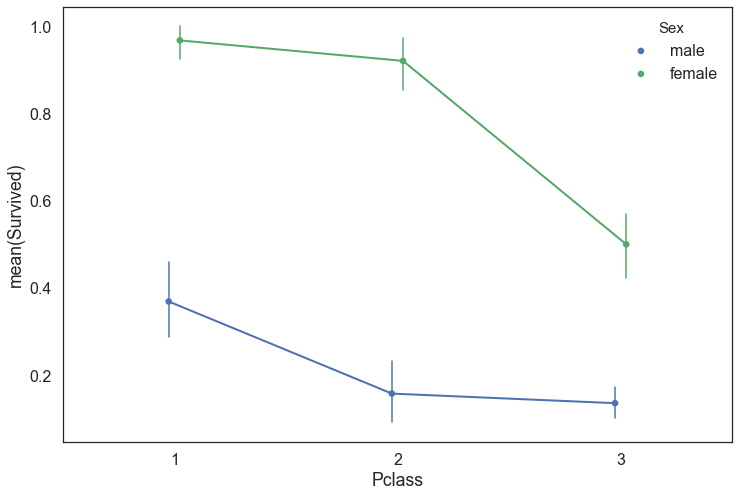

In [40]:
# Έλεγχος Class & Φύλλου
plt.figure(figsize=(12,8))
sns.set_style('white')
sns.set_context('poster',font_scale=1)
ax = sns.pointplot(x="Pclass", y="Survived", hue='Sex',
                   data=train_df, dodge=True, errwidth = 1.5, scale = 0.4)

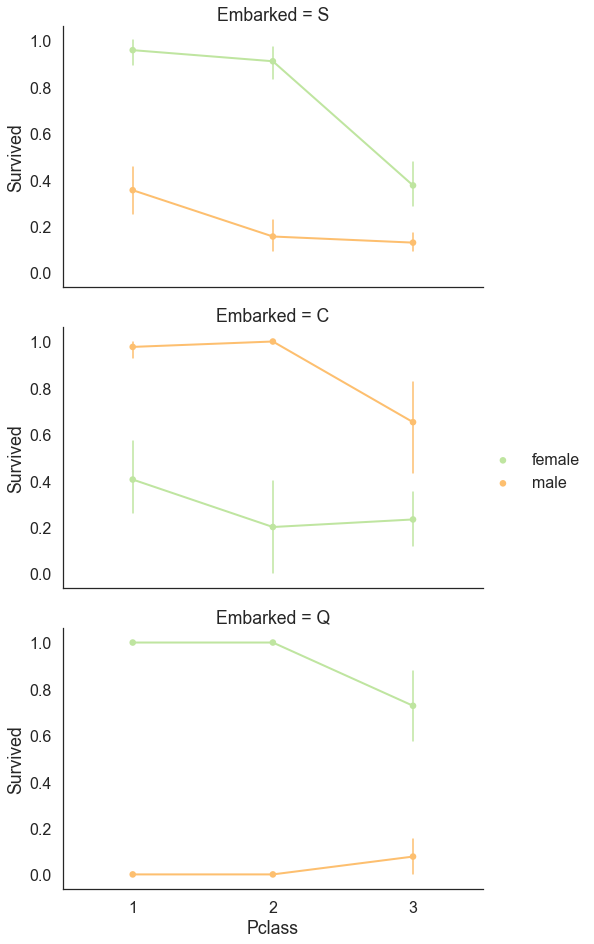

In [46]:
# Έλεγχος Λιμανιού επιβίβασης και φύλλου.
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Spectral',
              order=None, hue_order=None, errwidth = 1.5, scale = 0.4 )
FacetGrid.add_legend()

g = sns.factorplot(x="Sex", y="Survived", col="Pclass",data=train_df, saturation=.5, kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women"])
.set_titles(" {col_var} {col_name} ")
.set(ylim=(0, 1.3))
.despine(left=True)) 

g = sns.factorplot(x="Sex", y="Survived", col="Embarked",data=train_df, saturation=.5, kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women"])
.set_titles(" {col_var} {col_name} ")
.set(ylim=(0, 1.3))
.despine(left=True)) 